# Importing Libraries & load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/Dataset/new_train_sample.csv')
df.head(3)

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,...,NaN,NaN,5.0,66.0,NaN,Suspicious,Malicious,242.0,1445.0,10630.0
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,...,NaN,NaN,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,...,NaN,Destination,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7981 entries, 0 to 7980
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          7981 non-null   int64  
 1   Id                  7981 non-null   int64  
 2   OrgId               7981 non-null   int64  
 3   IncidentId          7981 non-null   int64  
 4   AlertId             7981 non-null   int64  
 5   Timestamp           7981 non-null   object 
 6   DetectorId          7981 non-null   int64  
 7   AlertTitle          7981 non-null   int64  
 8   Category            7981 non-null   object 
 9   MitreTechniques     3342 non-null   object 
 10  IncidentGrade       7938 non-null   object 
 11  ActionGrouped       47 non-null     object 
 12  ActionGranular      47 non-null     object 
 13  EntityType          7981 non-null   object 
 14  EvidenceRole        7981 non-null   object 
 15  DeviceId            7981 non-null   int64  
 16  Sha256

In [5]:
# Print the shape of the dataset
print(f"Dataset Shape: {df.shape}\n")

Dataset Shape: (7981, 46)



# EDA

In [6]:
df.describe()   # summary statistics

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,7.981000e+03,7.981000e+03,7981.000000,7981.000000,7.981000e+03,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,...,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000
mean,4.806370e+06,8.450489e+11,176.097857,71074.701291,4.015477e+05,103.029946,2511.140834,95564.320511,128923.380654,286572.793885,...,3331.624859,880.779602,262570.752913,107590.896003,3582.678988,4.907018,64.764160,224.320301,1354.247243,9953.617043
std,2.742411e+06,4.968738e+11,372.767953,121655.563417,4.561559e+05,412.593545,10316.090689,16690.014914,33691.118464,141216.479450,...,545.101832,13.921807,81032.850259,32295.760611,105.903984,0.672915,8.932916,61.777199,346.386090,2580.740477
min,4.340000e+02,3.710000e+02,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.441050e+06,4.037269e+11,9.000000,511.000000,2.212700e+04,2.000000,2.000000,98799.000000,138268.000000,360606.000000,...,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000
50%,4.858589e+06,8.504035e+11,42.000000,10361.000000,2.137860e+05,8.000000,11.000000,98799.000000,138268.000000,360606.000000,...,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000
75%,7.154735e+06,1.279900e+12,163.000000,86089.000000,6.524610e+05,42.000000,165.000000,98799.000000,138268.000000,360606.000000,...,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000
max,9.515959e+06,1.709397e+12,5298.000000,598227.000000,1.717221e+06,9199.000000,111977.000000,98799.000000,138268.000000,360606.000000,...,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000


In [7]:
# Distribution of the target variable
df['IncidentGrade'].value_counts(normalize=True)

,proportion
IncidentGrade,
BenignPositive,0.437516
TruePositive,0.351600
FalsePositive,0.210884


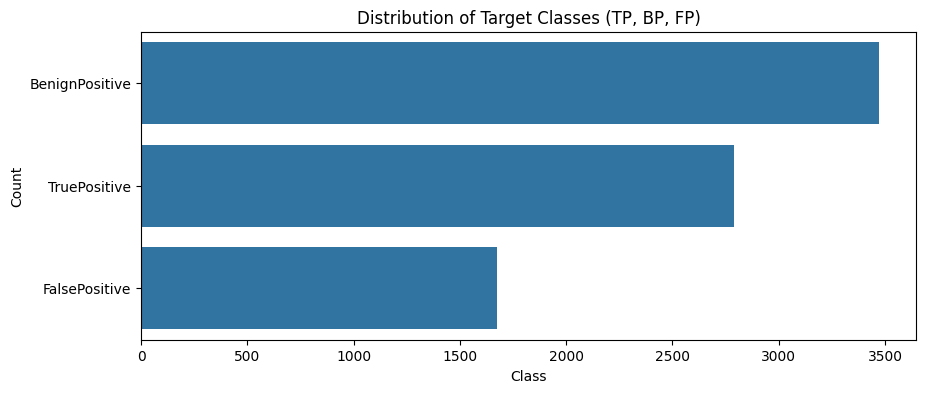


Class distribution:
IncidentGrade
BenignPositive    3473
TruePositive      2791
FalsePositive     1674
Name: count, dtype: int64


In [9]:
# Plot the distribution of the target variable
plt.figure(figsize=(10, 4))
sns.countplot(df['IncidentGrade'])  # Replace 'target_column' with the actual name of the target column
plt.title("Distribution of Target Classes (TP, BP, FP)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Optional: Print the counts of each class
print("\nClass distribution:")
print(df['IncidentGrade'].value_counts())

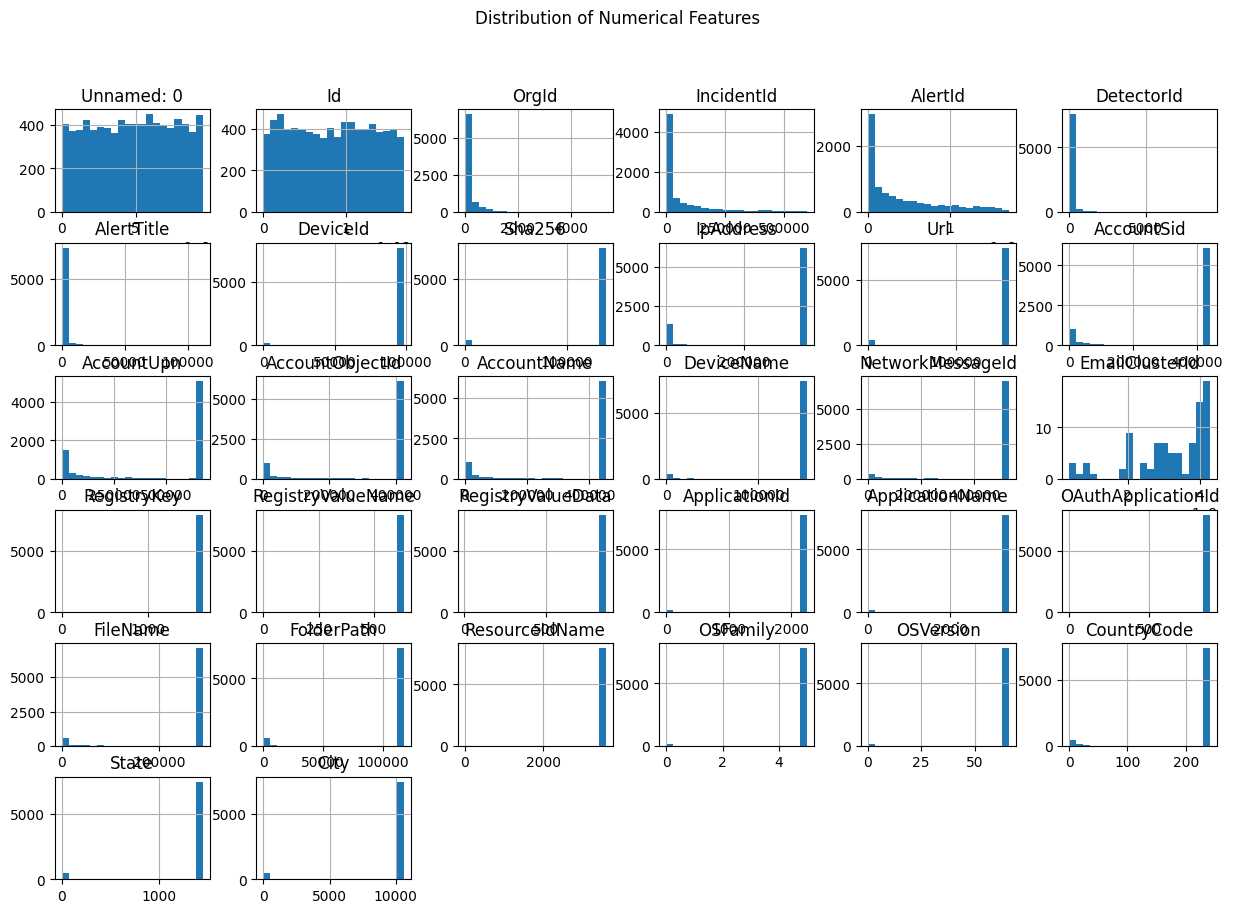

In [11]:
# Histograms for numerical features
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribution of Numerical Features")
plt.show()

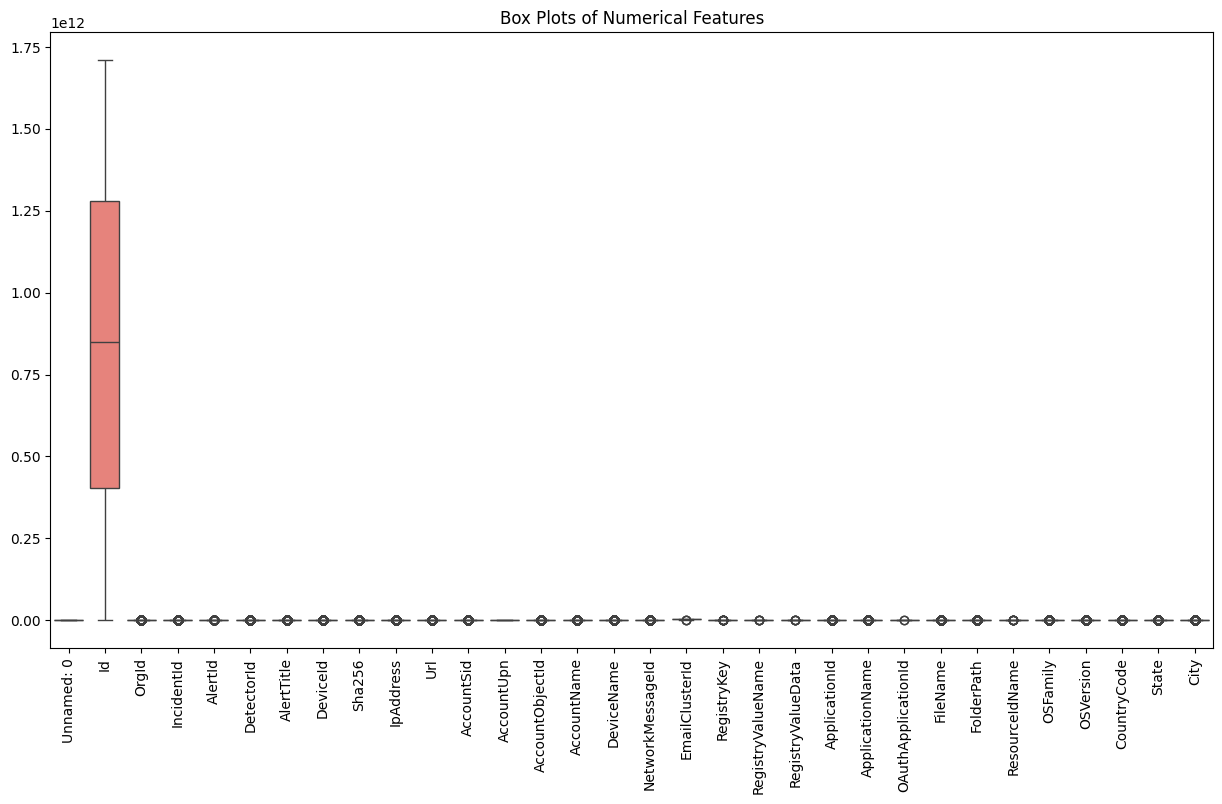

In [12]:
# Box plots for numerical features (detecting outliers)
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.title("Box Plots of Numerical Features")
plt.show()

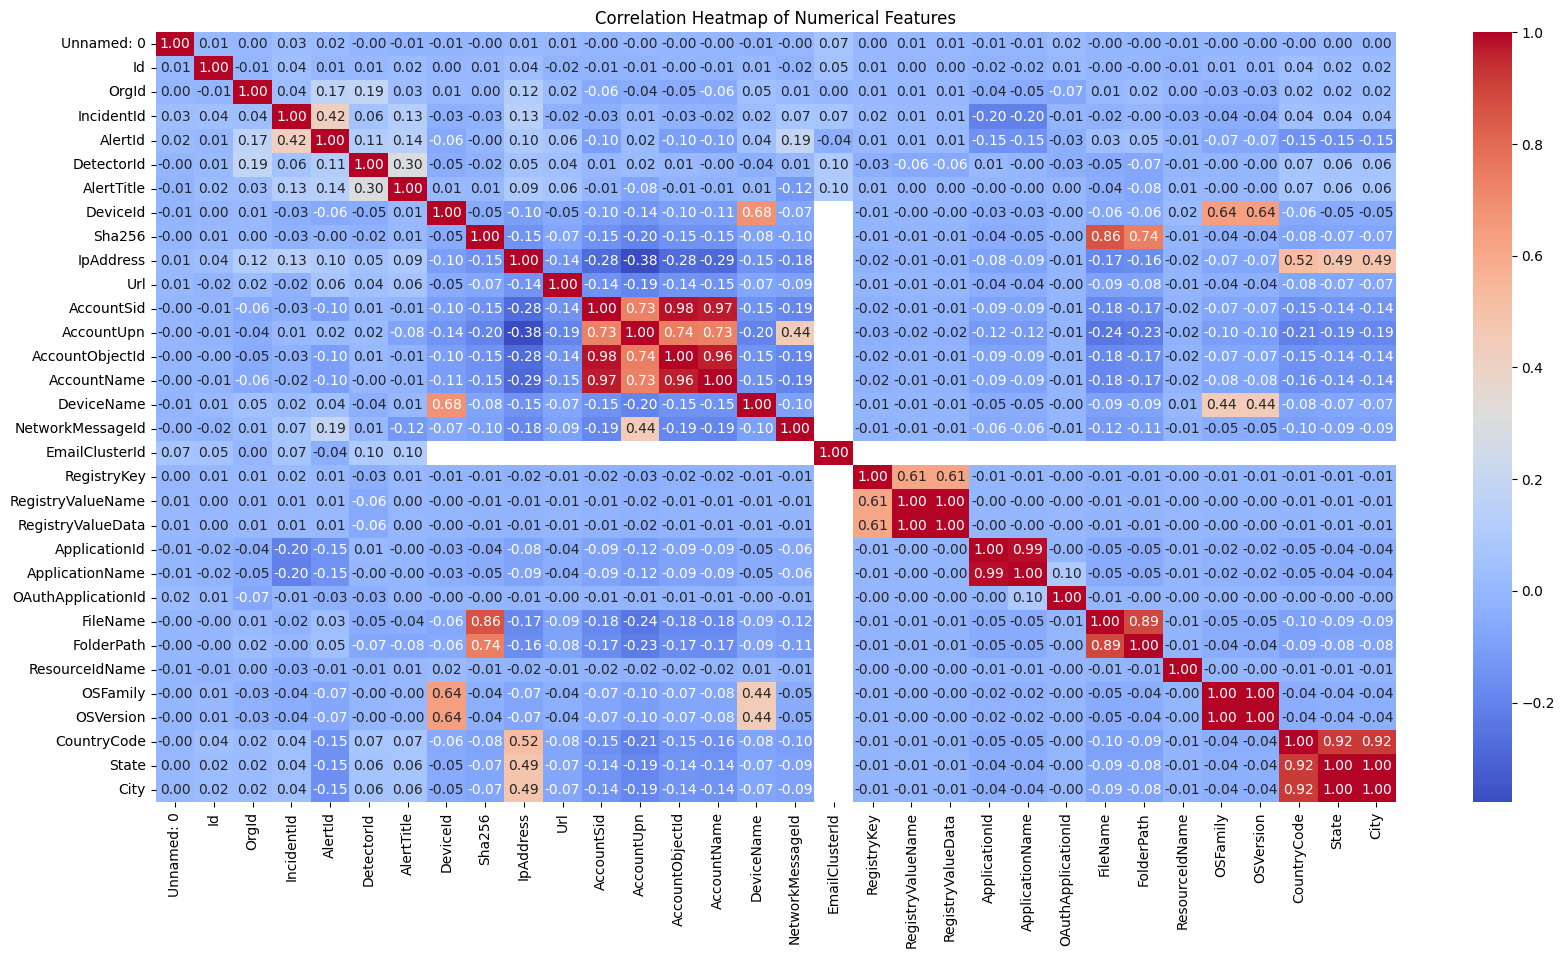

In [17]:
# Select only numerical columns
numerical_data = df.select_dtypes(include=[np.number])

# Calculate correlation matrix for numerical features
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()